# Homework 5 session 8,9

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
#original image data is a 2D array
X.shape

(1797, 64)

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


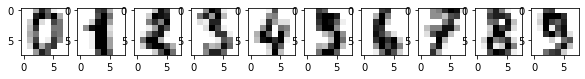

In [7]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [8]:
scalerX1 = preprocessing.StandardScaler().fit(X1)
X1_scaler = scalerX1.transform(X1)

In [10]:
X1_scaler.shape

(1000, 64)

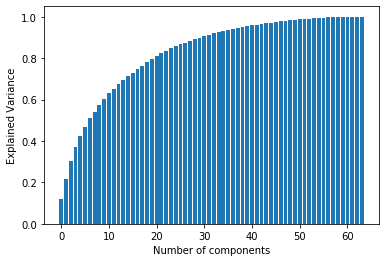

In [11]:
#perform PC decomposition over X1
pca = PCA(X1_scaler.shape[1])
X1_pca = pca.fit_transform(X1_scaler)
eigenvalues = pca.explained_variance_ratio_

n = X1_scaler.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [12]:
X1_pca[5]

array([-1.49724678e+00, -4.85286703e-01, -1.23450102e+00, -2.81483118e+00,
       -1.14316394e-01,  9.41651609e-01,  1.34623148e+00,  2.04085243e+00,
       -1.36815918e+00, -2.11756688e+00,  4.03813396e-01,  2.18892815e+00,
        8.37542241e-01,  3.04627563e-01,  1.50663254e+00, -6.03109383e-01,
        1.57697982e-01, -3.76239061e-01,  4.68540128e-02, -4.71775198e-01,
        1.15208164e+00,  6.66816764e-01,  1.71316812e-01, -4.78127466e-01,
        4.45415655e-01, -5.39818885e-01, -8.49535084e-01, -1.06062688e-01,
       -1.53885481e+00, -1.40198186e-02, -2.90285786e-02, -3.37090603e-01,
        9.94168847e-01, -8.02706685e-01,  9.10789224e-02, -4.47159757e-01,
        3.53609628e-01,  1.16322704e-01, -2.16983204e-01, -9.38757210e-02,
        8.15047560e-02,  7.29808292e-01,  2.28779261e-01,  3.83084487e-01,
        4.40417931e-01, -2.12368393e-01, -2.05268833e-01,  3.28976373e-01,
        4.80088408e-01, -1.44923593e-01,  1.57160922e-01,  1.98791988e-01,
       -1.31038301e-01,  

7 leading principal components are needed to cover 50% of the information from the original dataset ;
21 leading principal components are needed to cover 50% of the information from the original dataset

### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

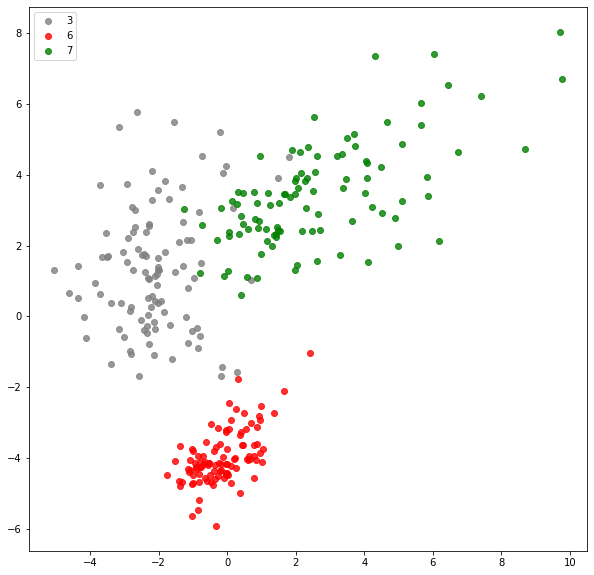

In [69]:
#colors = ('gray','red','green')
fig = plt.figure(figsize =(10, 10))
plt.plot(np.array(X1_pca[y1==3,0]), np.array(X1_pca[y1==3,1]),'o', color='gray', alpha=0.8, label='3')
plt.plot(np.array(X1_pca[y1==6,0]), np.array(X1_pca[y1==6,1]),'o', color='red', alpha=0.8, label='6')
plt.plot(np.array(X1_pca[y1==7,0]), np.array(X1_pca[y1==7,1]),'o', color='green', alpha=0.8, label='7')
plt.legend(['3','6','7'],loc='upper left')

## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [70]:
from sklearn.linear_model import LogisticRegression


scaler = preprocessing.StandardScaler().fit(X1)
X1_scaler = scaler.transform(X1)
pca = PCA(5)
X1_pca = pca.fit_transform(X1_scaler)

clf = LogisticRegression(C=10000).fit(X1_pca,y1)
y1_pred = np.asarray(clf.predict(X1_pca))


X3_scaler = scaler.transform(X3)
X3_pca = pca.transform(X3_scaler)

y3_pred = np.asarray(clf.predict(X3_pca))

print('Accuracy of Logistic regression on in-sample: {:}'.format(1.0*(y1_pred==y1).sum()/len(y1)))
print('Accuracy of Logistic regression on out-of-sample: {:}'.format(1.0*(y3_pred==y3).sum()/len(y3)))




Accuracy of Logistic regression on in-sample: 0.836
Accuracy of Logistic regression on out-of-sample: 0.7133333333333334


/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

In [71]:
R_train = []; R_val = []

for i in range(1,64):
    scaler = preprocessing.StandardScaler().fit(X1)
    X1_scaler = scaler.transform(X1)
    pca = PCA(i)
    X1_pca = pca.fit_transform(X1_scaler)

    clf = LogisticRegression(C=10000).fit(X1_pca,y1)
    y1_pred = np.asarray(clf.predict(X1_pca))

    X2_scaler = scaler.transform(X2)
    X2_pca = pca.transform(X2_scaler)
    y2_pred = np.asarray(clf.predict(X2_pca))
    R_train_score = 1.0*(y1_pred==y1).sum()/len(y1)
    R_val_score = 1.0*(y2_pred==y2).sum()/len(y2)
    R_train.append(R_train_score)
    R_val.append(R_val_score)

print(R_val.index(max(R_val))+1)

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Docume

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Docume

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Docume

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packag

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-pack

52


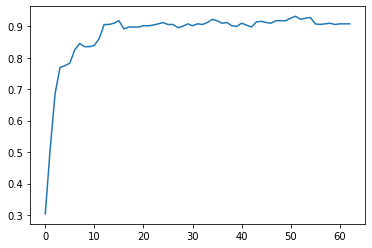

In [72]:
#plt.plot(R_train)
plt.plot(R_val)

In [73]:
#choose (52) principal components

from sklearn.linear_model import LogisticRegression

scaler = preprocessing.StandardScaler().fit(X1)
X1_scaler = scaler.transform(X1)
pca = PCA(52)
X1_pca = pca.fit_transform(X1_scaler)

clf = LogisticRegression(C=10000).fit(X1_pca,y1)
y1_pred = np.asarray(clf.predict(X1_pca))

#scaler = preprocessing.StandardScaler().fit(X3)
X3_scaler = scaler.transform(X3)
X3_pca = pca.transform(X3_scaler)

y3_pred = np.asarray(clf.predict(X3_pca))

print('Accuracy of Logistic regression on in-sample: {:}'.format(1.0*(y1_pred==y1).sum()/len(y1)))
print('Accuracy of Logistic regression on out-of-sample: {:}'.format(1.0*(y3_pred==y3).sum()/len(y3)))

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression on in-sample: 1.0
Accuracy of Logistic regression on out-of-sample: 0.86


## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [74]:
# import dataset
df = pd.read_csv("portland-oregon-average-monthly-.csv")

In [75]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [76]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [77]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
109,1969-02-01,1425
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394


In [78]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
month             114 non-null datetime64[ns]
avgMonthlyRide    114 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.2 KB


In [79]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


### Q1. Visualize the time-series of monthly ridership

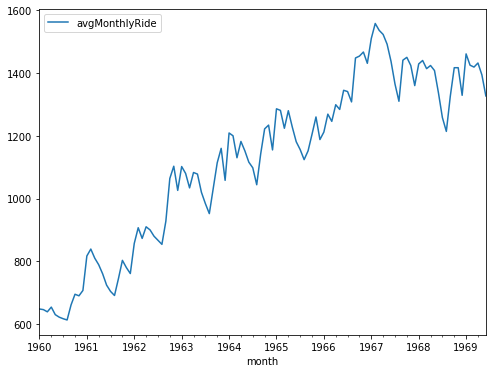

In [80]:
df.set_index('month').plot(figsize=(8, 6))

### Q2. Visualize the 12-month moving average to assess the trend

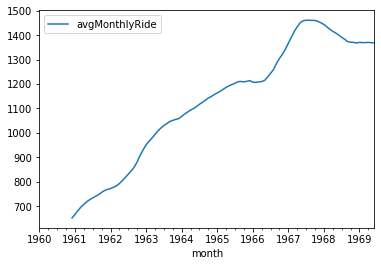

In [81]:
df.set_index('month').rolling(window=12).mean().plot()

### Q3. Perform seasonal decomposition using 12 month period

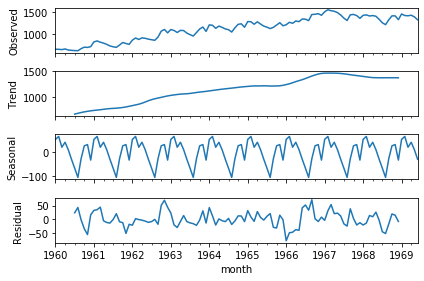

In [82]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


res = sm.tsa.seasonal_decompose(df.set_index('month'),model='additive', freq=12)
res.plot()
plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

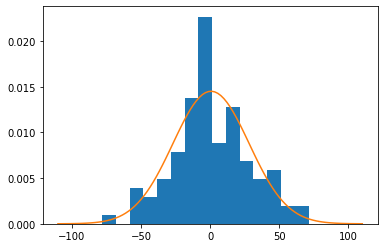

In [83]:
from numpy.random import seed
from numpy.random import randn
import scipy

seed(1)

addResult = sm.tsa.seasonal_decompose(df.set_index('month'),model='additive', freq=12)
residual = np.array(addResult.resid)
residual = residual[np.logical_not(np.isnan(residual))]

plt.hist(residual, bins=15, density=True)
sigma=residual.std()
x=np.linspace(-4*sigma,4*sigma,100)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma))
plt.show()

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

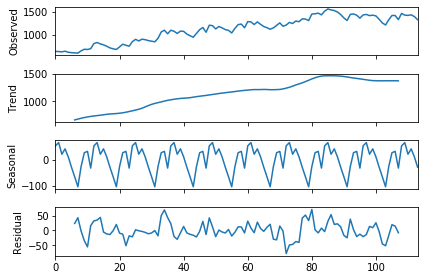

In [92]:
res = seasonal_decompose(df['avgMonthlyRide'],model='additive', freq=12)
res.plot()
plt.show()

In [93]:
res.resid

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
Name: avgMonthlyRide, Length: 114, dtype: float64

In [94]:
np.max(res.resid)

71.1763117283951

In [95]:
np.min(res.resid)

-78.15181327160481

In [96]:
Max=np.max(res.resid)
df[res.resid==Max]

,month,avgMonthlyRide
80,1966-09-01,1448


In [97]:
Min=np.min(res.resid)
df[res.resid==Min]

,month,avgMonthlyRide
72,1966-01-01,1212
